In [19]:
import numpy as np
import matplotlib.pyplot as plt
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [20]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.

    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """

    # TODO: compute errors
    y_pred = np.dot(X,W) + b
    error = y - y_pred

    # TODO: compute steps
    W_new = W + learn_rate * np.dot(error,X) / len(y)
    b_new = b + learn_rate * np.sum(error) / len(y)

    return W_new, b_new

In [21]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.

def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept

    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))

    return regression_coef


In [22]:
# Import data from CSV file
data = np.loadtxt('data-2.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
data

array([[-7.24070e-01,  2.23863e+00],
       [-2.40724e+00, -1.56000e-03],
       [ 2.64837e+00,  3.01665e+00],
       [ 3.60920e-01,  2.31019e+00],
       [ 6.73120e-01,  2.05950e+00],
       [-4.54600e-01,  1.24736e+00],
       [ 2.20168e+00,  2.82497e+00],
       [ 1.15605e+00,  2.21802e+00],
       [ 5.06940e-01,  1.43644e+00],
       [-8.59520e-01,  1.74980e+00],
       [-5.99700e-01,  1.63259e+00],
       [ 1.46804e+00,  2.43461e+00],
       [-1.05659e+00,  1.02226e+00],
       [ 1.29177e+00,  3.11769e+00],
       [-7.45650e-01,  8.11940e-01],
       [ 1.50330e-01,  2.81910e+00],
       [-1.49627e+00,  5.31050e-01],
       [-7.20710e-01,  1.64845e+00],
       [ 3.29240e-01,  1.91416e+00],
       [-2.80530e-01,  2.11376e+00],
       [-1.36115e+00,  1.70969e+00],
       [ 7.46780e-01,  2.92253e+00],
       [ 1.06210e-01,  3.29827e+00],
       [ 3.25600e-02,  1.58565e+00],
       [-9.82900e-01,  2.30455e+00],
       [-1.15661e+00,  1.79169e+00],
       [ 9.02400e-02,  1.54723e+00],
 

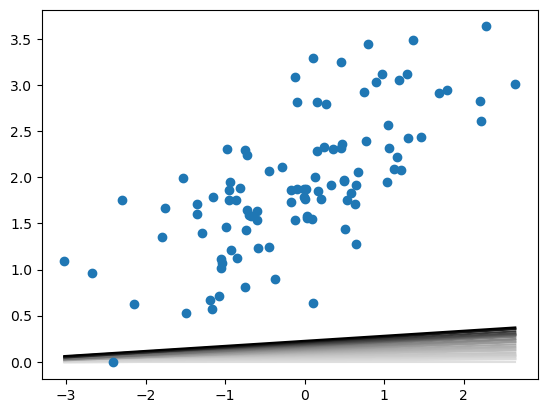

In [23]:
regression_coef = miniBatchGD(X, y)

# Plot the regression coefficient
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()